* Data Set

In [1]:
from keras.datasets import mnist

width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

Using TensorFlow backend.


In [2]:
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

In [3]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [4]:
y_train = y_train %2
y_val = y_val % 2
y_test = y_test % 2

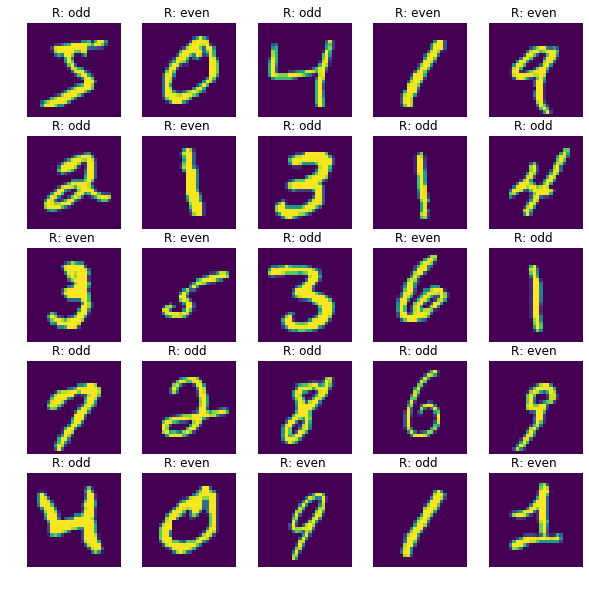

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)

plt.show()

### 다층퍼셉트론 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 96us/step - loss: 0.2841 - acc: 0.8899 - val_loss: 0.1496 - val_acc: 0.9505
Epoch 2/30
50000/50000 [==============================] - 4s 72us/step - loss: 0.1253 - acc: 0.9572 - val_loss: 0.0995 - val_acc: 0.9651
Epoch 3/30
50000/50000 [==============================] - 4s 72us/step - loss: 0.0890 - acc: 0.9690 - val_loss: 0.0830 - val_acc: 0.9703
Epoch 4/30
50000/50000 [==============================] - 4s 74us/step - loss: 0.0720 - acc: 0.9748 - val_loss: 0.0822 - val_acc: 0.9732
Epoch 5/30
50000/50000 [==============================] - 4s 73us/step - loss: 0.0597 - acc: 0.9796 - val_loss: 0.0899 - val_acc: 0.9673
Epoch 6/30
50000/50000 [==============================] - 4s 82us/step - loss: 0.0510 - acc: 0.9824 - val_loss: 0.0666 - val_acc: 0.9777
Epoch 7/30
50000/50000 [==============================] - 4s 77us/step - loss: 0.0445 - acc: 0.9846 - val_loss: 0.0639 - val_acc

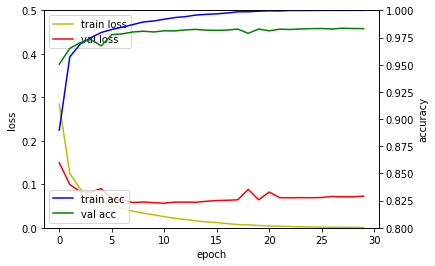

10000/10000 [==============================] - 0s 27us/step
## evaluation loss and_metrics ##
[0.05834891267314388, 0.9855]


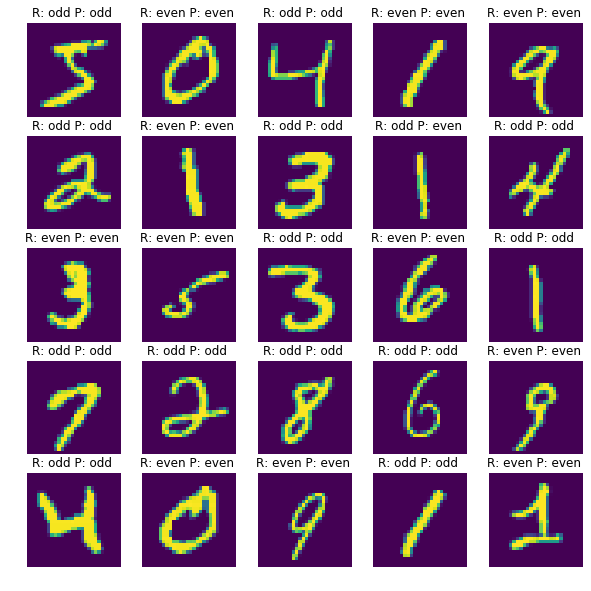

In [6]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train %2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
          
acc_ax = loss_ax.twinx()
          
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])
          
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
          
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_matrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_matrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)

plt.show()

### 컨볼루션 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 119us/step - loss: 0.3084 - acc: 0.8796 - val_loss: 0.1432 - val_acc: 0.9512
Epoch 2/30
50000/50000 [==============================] - 5s 100us/step - loss: 0.1230 - acc: 0.9560 - val_loss: 0.0902 - val_acc: 0.9688
Epoch 3/30
50000/50000 [==============================] - 5s 99us/step - loss: 0.0816 - acc: 0.9711 - val_loss: 0.0683 - val_acc: 0.9763
Epoch 4/30
50000/50000 [==============================] - 5s 101us/step - loss: 0.0659 - acc: 0.9763 - val_loss: 0.0582 - val_acc: 0.9790
Epoch 5/30
50000/50000 [==============================] - 5s 100us/step - loss: 0.0561 - acc: 0.9808 - val_loss: 0.0521 - val_acc: 0.9822
Epoch 6/30
50000/50000 [==============================] - 5s 100us/step - loss: 0.0505 - acc: 0.9824 - val_loss: 0.0481 - val_acc: 0.9847
Epoch 7/30
50000/50000 [==============================] - 5s 101us/step - loss: 0.0450 - acc: 0.9846 - val_loss: 0.0537 - v

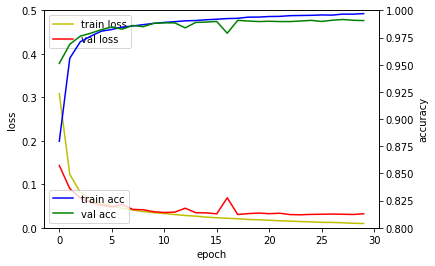

10000/10000 [==============================] - 0s 43us/step
## evaluation loss and_metrics ##
[0.023558064020916935, 0.9925]


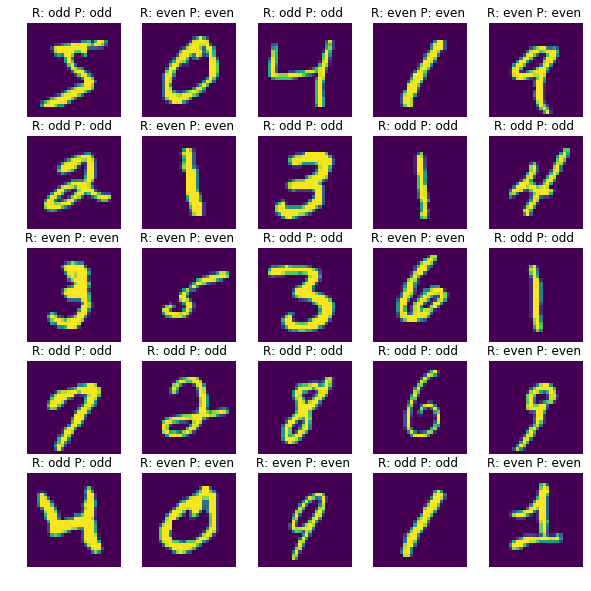

In [7]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train %2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
          
acc_ax = loss_ax.twinx()
          
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])
          
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
          
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_matrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_matrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)

plt.show()

### 깊은 컨볼루션 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 156us/step - loss: 0.3890 - acc: 0.8167 - val_loss: 0.1426 - val_acc: 0.9520
Epoch 2/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.1630 - acc: 0.9378 - val_loss: 0.0891 - val_acc: 0.9659
Epoch 3/30
50000/50000 [==============================] - 7s 143us/step - loss: 0.1131 - acc: 0.9593 - val_loss: 0.0667 - val_acc: 0.9756
Epoch 4/30
50000/50000 [==============================] - 7s 144us/step - loss: 0.0933 - acc: 0.9667 - val_loss: 0.0506 - val_acc: 0.9821
Epoch 5/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.0803 - acc: 0.9723 - val_loss: 0.0457 - val_acc: 0.9849
Epoch 6/30
50000/50000 [==============================] - 7s 145us/step - loss: 0.0699 - acc: 0.9752 - val_loss: 0.0400 - val_acc: 0.9865
Epoch 7/30
50000/50000 [==============================] - 7s 143us/step - loss: 0.0643 - acc: 0.9773 - val_loss: 0.0368 - 

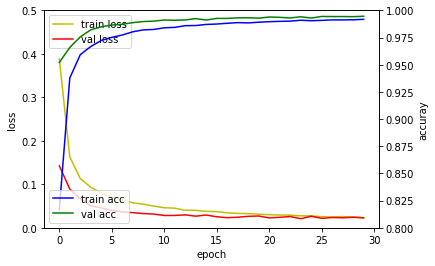

10000/10000 [==============================] - 1s 52us/step
## evaluation loss and_metrics ##
[0.014774181516357931, 0.9953]


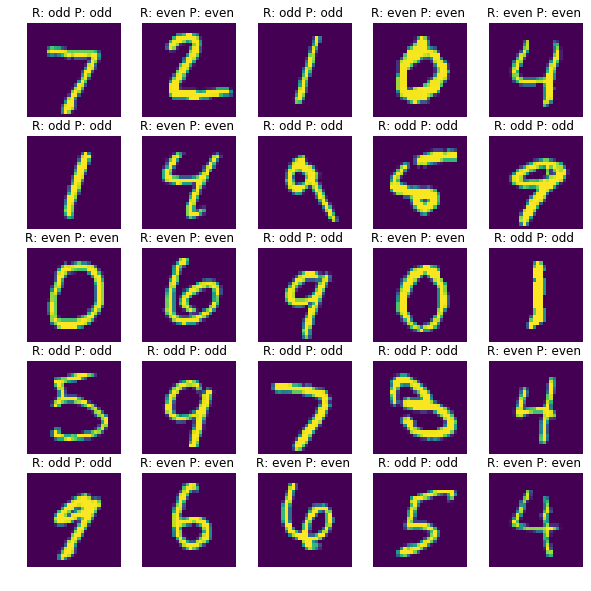

In [8]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()